In [1]:
import iris
from iris.experimental.equalise_cubes import equalise_attributes
import numpy as np
import glob
import matplotlib.pyplot as plt
from cf_units import Unit
import warnings
import datetime

In [2]:
def get_concatenated_cube(path):
    files = glob.glob(path, recursive=True)
    assert files
    files.sort()
    cube_list = iris.load(files)
    equalise_attributes(cube_list)
    out_cube = cube_list.concatenate_cube()
    return out_cube

In [3]:
def cube_multiply(big_cube, small_cube):
    """Returns the multiplication of two input cubes accounting for 
    missing coordinates in the smaller cube."""
    dim_diff = big_cube.ndim - small_cube.ndim
    assert big_cube.shape[dim_diff:] == small_cube.shape
    temp_cube = small_cube.copy() #as to not make changes to small_cube
    #add aux coords to smaller cube to enable multiply
    for coord in big_cube.coords():
        if coord not in temp_cube.coords():
            temp_cube.add_aux_coord(coord[0])
    out_cube = big_cube * temp_cube
    return out_cube

In [4]:
def date_BOM(date):
    """Return beginning of month of given date."""
    return date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)

In [5]:
def time_constraint(cube):
    """Returns iris constraint to extract all time coordinates in the same month."""
    cube_coord = cube.coord('time')
    cube_coord_points = cube_coord.units.num2date(cube_coord.points)
    constraint = iris.Constraint(time = lambda cell: date_BOM(cell.point) \
        in [date_BOM(date) for date in cube_coord_points])
    return constraint

In [6]:
model_path = {'ACCESS-CM2': '/g/data/fs38/publications/CMIP6/FAFMIP/CSIRO-ARCCSS/ACCESS-CM2/',
              'CAS-ESM2-0': '/g/data/oi10/replicas/CMIP6/FAFMIP/CAS/CAS-ESM2-0/',
              'FGOALS-g3': '/g/data/oi10/replicas/CMIP6/FAFMIP/CAS/FGOALS-g3/',
              'CANESM5': '/g/data/oi10/replicas/CMIP6/FAFMIP/CCCma/CanESM5/',
              'MIROC6': '/g/data/oi10/replicas/CMIP6/FAFMIP/MIROC/MIROC6/',
              'MPI-ESM1-2-HR': '/g/data/oi10/replicas/CMIP6/FAFMIP/MPI-M/MPI-ESM1-2-HR/',
              'MRI-ESM2-0': '/g/data/oi10/replicas/CMIP6/FAFMIP/MRI/MRI-ESM2-0/',
              'CESM2': '/g/data/oi10/replicas/CMIP6/FAFMIP/NCAR/CESM2/',
              'GFDL-ESM2M': '/g/data/oi10/replicas/CMIP6/FAFMIP/NOAA-GFDL/GFDL-ESM2M/'
             }

In [7]:
experiment_path = {'faf-heat': 'faf-heat/r1i1p1f1/',
                   'faf-passiveheat': 'faf-passiveheat/r1i1p1f1/',
                   'faf-water': 'faf-water/r1i1p1f1/',
                   'faf-stress': 'faf-stress/r1i1p1f1/',
                   'faf-all': 'faf-all/r1i1p1f1/'
                  }

In [8]:
variable_path = {'areacello': 'Ofx/areacello/gn/v*/**/*.nc',
                 'volcello': 'Ofx/volcello/gn/v*/**/*.nc',
                 'thetao': 'Omon/thetao/gn/v*/**/*.nc',
                 'bigthetao': 'Omon/bigthetao/gn/v*/**/*.nc',
                 'so': 'Omon/so/gn/v*/**/*.nc',
                 'hfds': 'Omon/hfds/gn/v*/**/*.nc',
                 'wfo': 'Omon/wfo/gn/v*/**/*.nc',
                 'ocontemptend': 'Oyr/ocontemptend/gn/v*/**/*.nc',
                 'opottemptend': 'Oyr/opottemptend/gn/v*/**/*.nc',
                 'ocontempdiff': 'Oyr/ocontempdiff/gn/v*/**/*.nc',
                 'ocontemppmdiff': 'Oyr/ocontemppmdiff/gn/v*/**/*.nc',
                 'ocontemppadvect': 'Oyr/ocontemppadvect/gn/v*/**/*.nc',
                 'ocontemppsmadvect': 'Oyr/ocontemppsmadvect/gn/v*/**/*.nc',
                 'ocontemprmadvect': 'Oyr/ocontemprmadvect/gn/v*/**/*.nc',
                 'osaltdiff': 'Oyr/osaltdiff/gn/v*/**/*.nc',
                 'osaltpadvect': 'Oyr/osaltpadvect/gn/v*/**/*.nc',
                 'osaltpmdiff': 'Oyr/osaltpmdiff/gn/v*/**/*.nc',
                 'osaltpsmadvect': 'Oyr/osaltpsmadvect/gn/v*/**/*.nc',
                 'osaltrmadvect': 'Oyr/osaltrmadvect/gn/v*/**/*.nc',
                 'osalttend': 'Oyr/osalttend/gn/v*/**/*.nc',
                 'rsdoabsorb': 'Oyr/rsdoabsorb/gn/v*/**/*.nc'
                }

### Parameters

In [9]:
model = 'ACCESS-CM2'
experiment = 'faf-heat'
nbins = 100
bin_edges =  np.linspace(-5,40,nbins)

In [10]:
#Loading cubes
cube_list = {}
for var, path in variable_path.items():
    try:
        cube_list[var] = get_concatenated_cube(model_path[model]+experiment_path[experiment]+path)
    except AssertionError:
        print(f'No files in {path}')

/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'volcello'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'thetao'
  warnings.warn(message % (variable_name, nc_var_name))

No files in Oyr/opottemptend/gn/v*/**/*.nc


/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'ocontempdiff'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'ocontempdiff'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'ocontemppmdiff'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/e14/sw4281/miniconda3/envs/ra/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'ocontemppmdiff'
  warnings.warn(message % (var

In [25]:
hist={}
for var,cube in cube_list.items():
    if cube.units == Unit('W m-2'):
        w_cube = cube_multiply(cube,cube_list['areacello'])
        temp_cube=cube_list['bigthetao'].extract(time_constraint(w_cube))
        if 'depth' not in [coord.standard_name for coord in w_cube.coords()]:
            temp_cube = temp_cube.extract(iris.Constraint(depth=0))
        assert w_cube.shape == temp_cube.shape
        hist[var] = [np.histogram(temp_cube.data.compressed(),bins=bin_edges, weights=w_cube.data.compressed()),len(w_cube.coord('time').points)]

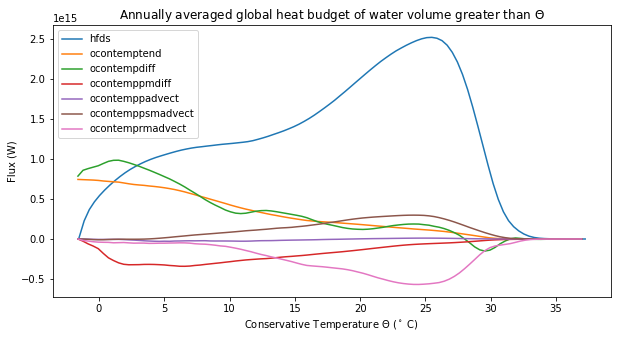

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
for var,[[dist,edges],tlen] in hist.items():
    if var != 'rsdoabsorb':
        ax.plot(edges[1:],np.cumsum((dist/tlen)[::-1])[::-1],label = var)
ax.legend()
ax.set_xlabel(r'Conservative Temperature $\Theta$ ($^\circ$ C)')
ax.set_ylabel('Flux (W)')
ax.set_title('Annually averaged global heat budget of water volume greater than $\Theta$')
fig.savefig('ACCESS-CM2_budget_temp',dpi=1000)

### Other exploratory stuff

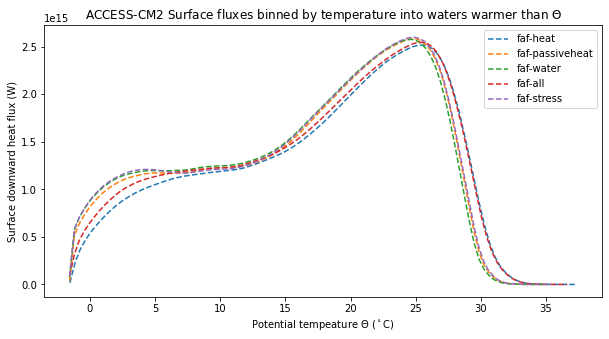

In [213]:
fig,ax = plt.subplots(figsize=(10,5))
for exp in hfds_plot:
    ax.plot(hfds_plot[exp][1][1:],np.cumsum(hfds_plot[exp][0][::-1]/840.)[::-1],'--',label=exp)
ax.legend()
ax.set_title(r'ACCESS-CM2 Surface fluxes binned by temperature into waters warmer than $\Theta$')
ax.set_ylabel('Surface downward heat flux (W)')
ax.set_xlabel(r'Potential tempeature $\Theta$ ($^\circ$C)')
fig.savefig('../results/ACCESS-CM2_surface_fluxes_temp',dpi=1000)

In [178]:
[var for var,cube in cube_list.items() if cube.units == Unit('W m-2')]

['hfds',
 'ocontemptend',
 'ocontempdiff',
 'ocontemppmdiff',
 'ocontemppadvect',
 'ocontemppsmadvect',
 'ocontemprmadvect',
 'rsdoabsorb']

In [26]:
hfds_cube = cube_multiply(cube_list['hfds'].extract(time_constraint(cube_list['rsdoabsorb'])),cube_list['areacello'])

In [27]:
rsdo_cube=cube_multiply(cube_list['rsdoabsorb'].collapsed('depth',iris.analysis.SUM),cube_list['areacello'])

In [28]:
temp_cube = cube_list['bigthetao'].extract(time_constraint(cube_list['rsdoabsorb']) & iris.Constraint(depth=0))

In [44]:
dist,edges = np.histogram(temp_cube.data.compressed(),bins=bin_edges,weights=hfds_cube.data.compressed())

In [29]:
hist['modhfds'] = [np.histogram(temp_cube.data.compressed(),bins=bin_edges,weights=hfds_cube.data.compressed()-rsdo_cube.data.compressed()),70]

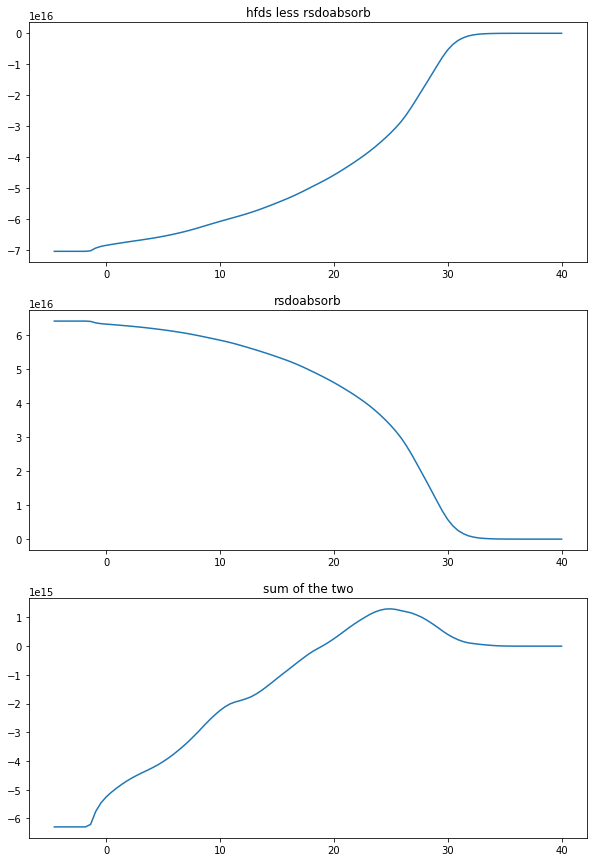

In [42]:
fig,axs = plt.subplots(3,1,figsize=(10,15))
axs[0].set_title('hfds less rsdoabsorb')
axs[0].plot(hist['modhfds'][0][1][1:],np.cumsum((hist['modhfds'][0][0]/70)[::-1])[::-1])
axs[1].set_title('rsdoabsorb')
axs[1].plot(hist['rsdoabsorb'][0][1][1:],np.cumsum((hist['rsdoabsorb'][0][0]/70)[::-1])[::-1])
axs[2].set_title('sum of the two')
axs[2].plot(hist['modhfds'][0][1][1:],np.cumsum(((hist['rsdoabsorb'][0][0]+hist['modhfds'][0][0])/70)[::-1])[::-1])
fig.savefig('../results/hfds_rsdoabsorb_modification')